# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = url + "q=" + city + "&appid=" + weather_api_key
print("Beginning Data Retrieval\n-----------------------------")
weather_response = requests.get(api_key).json()

City = []
Lat = []        
Lng = []   
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

count = 1
set_count = 1

for city in cities:
    
    try:
        
        response = requests.get(url + "q=" + city + "&appid=" + weather_api_key).json()
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        print(f"Processing Record {count} of Set {set_count} | {city}")
        
        if count != 50:
            count += 1
        else:
            count = 0
            set_count += 1 
            
        time.sleep(1.02)
        
    except:
        
        print("City not found. Skipping...")

print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | san quintin
Processing Record 4 of Set 1 | comodoro rivadavia
Processing Record 5 of Set 1 | kathmandu
Processing Record 6 of Set 1 | atuona
City not found. Skipping...
Processing Record 7 of Set 1 | sechura
Processing Record 8 of Set 1 | deer lake
Processing Record 9 of Set 1 | wuwei
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of Set 1 | klaksvik
City not found. Skipping...
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | atar
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | itarema
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | coxim
Processing Record 20 of Set 1 | ribeira grande
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [110]:
df = pd.DataFrame({'City':City, 'Latitude':Lat, 'Longitude':Lng, 'Max Temperature':Max_Temp, 
              'Humidity':Humidity, 'Cloudiness':Cloudiness, 'Wind Speed':Wind_Speed, 
              'Country':Country, 'Date':Date})

#To check current date for graphing year on matplotlib graphs
date = df['Date'].apply(lambda x: time.strftime('%m-%d-%Y', time.localtime(x)))


city_data = df.to_csv('../Resources/city_data.csv', index = False)
df.count()

City               551
Latitude           551
Longitude          551
Max Temperature    551
Humidity           551
Cloudiness         551
Wind Speed         551
Country            551
Date               551
dtype: int64

In [111]:
df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,292.50,65,0,7.84,PF,1595534095
1,Busselton,-33.65,115.33,279.82,74,0,1.81,AU,1595534096
2,San Quintín,30.48,-115.95,294.30,62,0,5.42,MX,1595534097
3,Comodoro Rivadavia,-45.87,-67.50,279.15,75,0,2.10,AR,1595534099
4,Kathmandu,27.72,85.32,294.15,100,90,1.50,NP,1595534006


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [112]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Used drop function to after locating all the values with 100 humidity and 
#get index for those values in order for drop function to drop those indexes

clean_city_data = df.drop(df[df['Humidity'] == 100].index, inplace = False)
clean_city_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,292.50,65,0,7.84,PF,1595534095
1,Busselton,-33.65,115.33,279.82,74,0,1.81,AU,1595534096
2,San Quintín,30.48,-115.95,294.30,62,0,5.42,MX,1595534097
3,Comodoro Rivadavia,-45.87,-67.50,279.15,75,0,2.10,AR,1595534099
5,Atuona,-9.80,-139.03,299.08,76,0,8.40,PF,1595534101


In [113]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

clean_city_data.to_csv('../Resources/clean_city_data.csv', index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

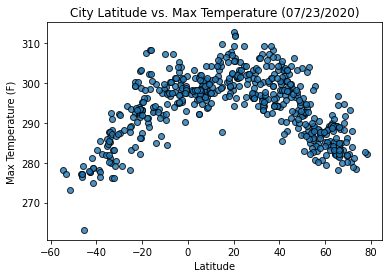

In [118]:
plt.scatter(x = clean_city_data['Latitude'], y = clean_city_data['Max Temperature'], alpha = 0.8, edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (07/23/2020)")
plt.show()

## Latitude vs. Humidity Plot

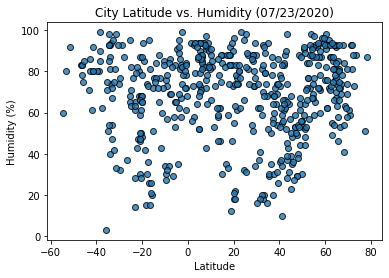

In [119]:
plt.scatter(x = clean_city_data['Latitude'], y = clean_city_data['Humidity'], alpha = 0.8, edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (07/23/2020)")
plt.show()

## Latitude vs. Cloudiness Plot

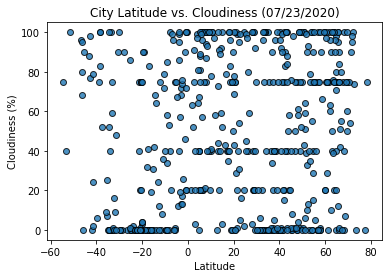

In [120]:
plt.scatter(x = clean_city_data['Latitude'], y = clean_city_data['Cloudiness'], alpha = 0.8, edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (07/23/2020)")
plt.show()

## Latitude vs. Wind Speed Plot

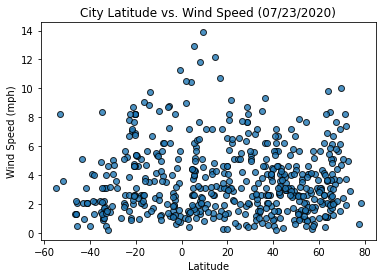

In [121]:
plt.scatter(x = clean_city_data['Latitude'], y = clean_city_data['Wind Speed'], alpha = 0.8, edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (07/23/2020)")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
plt.scatter()

The r-squared is: 0.8271188905041935


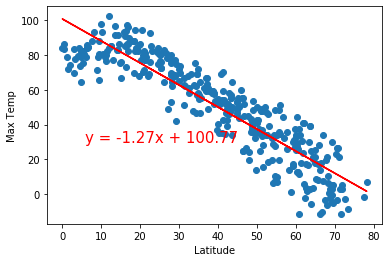

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


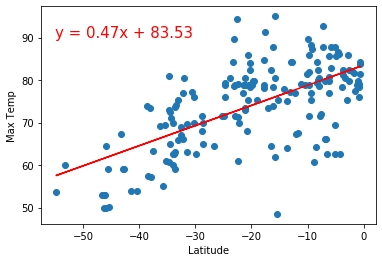

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


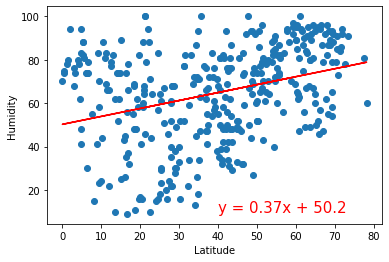

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


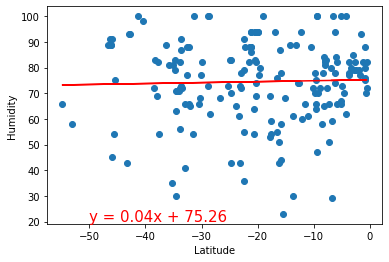

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


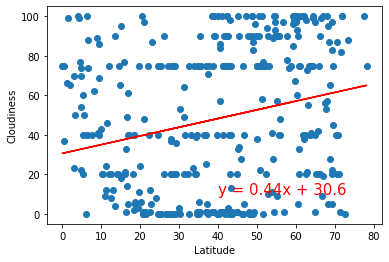

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


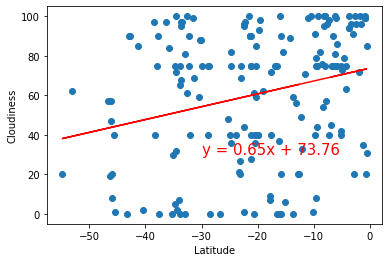

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


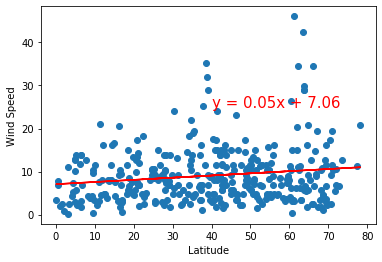

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


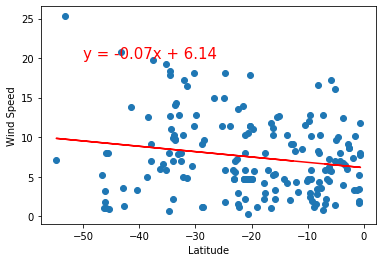